In [2]:
# The objective of this analysis is to ascertain whether a worker will be absent for less than an hour, up to a day, or more than a day.

In [3]:
# Importing relevant libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Importing dataset.

data = pd.read_excel('C:\\Users\\hp\\Desktop\\Absenteeism_at_work_AAA\\Absenteeism_at_work.xls')
data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,2


In [5]:
# Checking for missing values.
# The results below show that there are no missing values (False), therefore, the sum of the missing values is zero (0)

print(data.isna().any())
print(data.isna().sum())

ID                                 False
Reason for absence                 False
Month of absence                   False
Day of the week                    False
Seasons                            False
Transportation expense             False
Distance from Residence to Work    False
Service time                       False
Age                                False
Work load Average/day              False
Hit target                         False
Disciplinary failure               False
Education                          False
Son                                False
Social drinker                     False
Social smoker                      False
Pet                                False
Weight                             False
Height                             False
Body mass index                    False
Absenteeism time in hours          False
dtype: bool
ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null int64
Reason for absence                 740 non-null int64
Month of absence                   740 non-null int64
Day of the week                    740 non-null int64
Seasons                            740 non-null int64
Transportation expense             740 non-null int64
Distance from Residence to Work    740 non-null int64
Service time                       740 non-null int64
Age                                740 non-null int64
Work load Average/day              740 non-null int64
Hit target                         740 non-null int64
Disciplinary failure               740 non-null int64
Education                          740 non-null int64
Son                                740 non-null int64
Social drinker                     740 non-null int64
Social smoker                      740 non-null int64
Pet                            

In [7]:
# Fetching descriptive statistics for the data.

data.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271490.235135,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39058.116188,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294217.000000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [8]:
# Renaming the target column cos we think it is too long.


data['Absenteeism time in hours'] = data.rename(columns = {'Absenteeism time in hours' : 'Absent'}, inplace = True)
data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absent,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239554,...,1,2,1,0,1,90,172,30,4,None
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,0,0,98,178,31,0,None
2,3,23,7,4,1,179,51,18,38,239554,...,1,0,1,0,0,89,170,31,2,None
3,7,7,7,5,1,279,5,14,39,239554,...,1,2,1,1,0,68,168,24,4,None
4,11,23,7,5,1,289,36,13,33,239554,...,1,2,1,0,1,90,172,30,2,None


In [9]:
# Finding the different absent times (Unique count of hours absent).

data['Absenteeism time in hours'].value_counts()

Series([], Name: Absenteeism time in hours, dtype: int64)

In [10]:
# The result above is because we have renamed that column.
# Below is the right code to finding the unique count of hours absent.

In [11]:
data['Absent'].value_counts()

8      208
2      157
3      112
1       88
4       60
0       44
16      19
24      16
40       7
5        7
32       6
64       3
80       3
120      3
112      2
56       2
48       1
7        1
104      1
Name: Absent, dtype: int64

In [12]:
# A little Feature Engineering.
# There are 19 classes in this category and we shall be reducing them to 3.


data[data['Absent'] <= 1] = 0  # Assign 0 if number of times absent is less than or equal to 1 hour.
data[(data['Absent'] > 1) & (data['Absent'] <= 24)] = 1 # Assign 1 if number of times absent is greater than 1 and less than or equal to 24 hours.
data[data['Absent'] > 24] = 2  # Assign 2 if number of hours absent is greater than 24 hours.

In [13]:
# Checking the unique counts of hours absent after the regrouping.

data.Absent.value_counts()

1    580
0    132
2     28
Name: Absent, dtype: int64

In [14]:
# The above shows that 580 persons were absent for more than an hour but not more than a day.
# 132 persons were either absent for an hour or not absent at all.
# 28 persons were absent for more than a day.

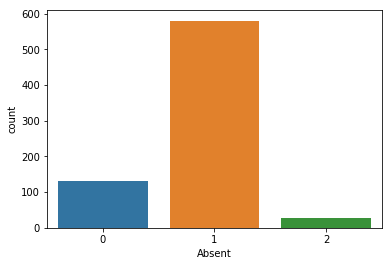

In [15]:
# The above information can also be viewed pictorally below;

import seaborn as sns

sns.countplot(data['Absent'])

In [47]:
# Checking for observations where season is 1, Age is 33, and number of sons is 2.

# data[(data['Seasons']==1) & (data['Age']==33) & (data['Son']==2)]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absent,Absenteeism time in hours


In [25]:
data.shape

(740, 22)

In [26]:
data.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index', 'Absent',
       'Absenteeism time in hours'],
      dtype='object')

In [27]:
# Defining x and y.
# We will be using some features that'll best explain the target based on apriori knowledge.

x = data.iloc[:, [3,4,5,6,7,8,9,10,11,12,14,19]].values
y = data.iloc[:, 20].values

In [30]:
# Split the data into train and test sets.

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.25, random_state = 0)

In [31]:
# INTRODUCING THE ALGORITHM IN ORDER TO BUILD THE MODELS.
# ALGORITHM 1:
# KNN

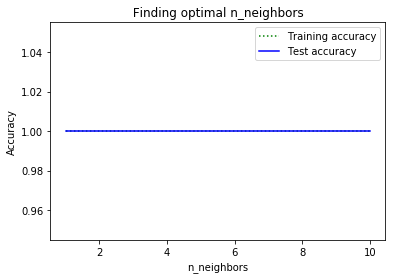

In [32]:
# Finding optimal n_neighbors.

from sklearn.neighbors import KNeighborsClassifier

n_rng = range(1,11)

Training_accuracy = []
Test_accuracy = []

for n in n_rng:
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(x_train,y_train)
    Training_accuracy.append(knn.score(x_train,y_train))
    Test_accuracy.append(knn.score(x_test,y_test))
    

# Plotting n_rng against accuracy to find optimal n_neighbors

plt.plot(n_rng, Training_accuracy, label = 'Training accuracy', c = 'green', linestyle = 'dotted')
plt.plot(n_rng, Test_accuracy, label = 'Test accuracy', c = 'blue')
plt.title(' Finding optimal n_neighbors ')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')

plt.legend()

In [33]:
# The graph above shows that whatever n_neighbors (from 1-10) we choose, both Training and Test sets will be 100% accurate.
# We'll therefore use the default n_neighbors (default is 5).

k_classifier = KNeighborsClassifier()
k_classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [34]:
# Checking for the accuracy of the classifier.

print('The accuracy of k_classifier on the training set is {:.3f}'.format(k_classifier.score(x_train,y_train)))
print('The accuracy of k_classifier on the test set is {:.3f}'.format(k_classifier.score(x_test,y_test)))

The accuracy of k_classifier on the training set is 1.000
The accuracy of k_classifier on the test set is 1.000


In [35]:
# The above scores show a perfect accuracy of the training and test sets which could insinuate overfitting.

In [36]:
# Predicting with the model.

y_predk = k_classifier.predict(x_test)
y_predk

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 2, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 0, 1, 1, 0, 1, 1], dtype=int64)

In [37]:
# Checking for the performance of the model

from sklearn import metrics

Accuracy = metrics.accuracy_score(y_test,y_predk)
#Precision = metrics.precision_score(y_test,y_predk)
#Recall = metrics.recall_score(y_test,y_predk)

Conmax = metrics.confusion_matrix(y_test,y_predk)

print('Accuracy is', Accuracy)
#print('Precision is', Precision)
#print('Recall is', Recall)

print('Confusion matrix:\n', Conmax)

Accuracy is 1.0
Confusion matrix:
 [[ 31   0   0]
 [  0 147   0]
 [  0   0   7]]


In [38]:
# Precision and Recall do not work for multiclass targets. They only work for binary targets.
# Binary target has either 0 or 1 as outcome. eg buy or do not buy, attend or do not attend.
# Multiclass could have many outcomes eg resumption = morning, afternoon, or night.


In [39]:
# ALGORITHM 2
# LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression

l_classifier = LogisticRegression()
l_classifier.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [40]:
# Checking for model accuracy.

training_accuracy = l_classifier.score(x_train,y_train)
test_accuracy = l_classifier.score(x_test,y_test)

print('Training accuracy is {:.2f}'.format(training_accuracy))
print('Test accuracy is {:.2f}'.format(test_accuracy))

Training accuracy is 0.96
Test accuracy is 0.96


In [41]:
# Changing the value of 'C' in a bid to improve the model.
# C=100

l_classifier2 = LogisticRegression(C=100)
l_classifier2.fit(x_train,y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [42]:
# Checking the accuracy of the new model where C=100.

training_accuracy = l_classifier2.score(x_train,y_train)
test_accuracy = l_classifier2.score(x_test,y_test)

print('Training accuracy is {:.2f}'.format(training_accuracy))
print('Test accuracy is {:.2f}'.format(test_accuracy))

Training accuracy is 0.96
Test accuracy is 0.96


In [43]:
# C=0.01

l_classifier3 = LogisticRegression(C=0.01)
l_classifier3.fit(x_train,y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [44]:
# Checking the accuracy of the new model where C=0.01.

print('Training accuracy: {:.2f}'.format(l_classifier3.score(x_train,y_train)))
print('Test accuracy: {:.2f}'.format(l_classifier3.score(x_test,y_test)))

Training accuracy: 0.96
Test accuracy: 0.96


In [88]:
# ALGORITHM 3
# DECISION TREE

In [89]:
# Training the model.

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [90]:
# Evaluating the model's performance.

print ('Training accuracy: {:.3f}'.format(tree.score(x_train,y_train)))
print('Test accuracy: {:.3f}'.format(tree.score(x_test,y_test)))

Training accuracy: 1.000
Test accuracy: 1.000


In [55]:
# ALGORITHM 4
# RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [56]:
# PREDICTING WITH THE MODEL.

y_pred_r = forest.predict(x_test)
y_pred_r

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 2, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 0, 1, 1, 0, 1, 1], dtype=int64)

In [57]:
# EVALUATING THE PERFORMANCE OF THE MODEL.

print ('Accuracy of the training set is', forest.score(x_train,y_train))
print('Accuracy score is {:.3f}'.format(forest.score(x_test,y_test)))

Accuracy of the training set is 1.0
Accuracy score is 1.000


In [58]:
# ALTERNATIVE EVALUATION,

from sklearn import metrics

print('Accuracy score =', metrics.accuracy_score(y_test,y_pred_r))

Accuracy score = 1.0


In [59]:
# OR

print('Accuracy score is {:.3f}'.format(metrics.accuracy_score(y_test,y_pred_r)))

Accuracy score is 1.000


In [60]:
# OPTIMIZING THE RESULT
# Tweaking n_estimators which refers to the number of trees in the Random Forest.
# The more trees the better the result of the model'
# let us increase n_estimators from default (10) to 100.
# Also, let n_jobs = -1 and random_state = 0

forest = RandomForestClassifier(n_estimators = 100, n_jobs = -1, random_state = 0)
forest.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [61]:
# Predicting with the new model.

y_pred_rf = forest.predict(x_test)
y_pred_rf

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 2, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 0, 1, 1, 0, 1, 1], dtype=int64)

In [62]:
# EVALUATING THE PERFORMANCE OF THE NEW MODEL,

print('Accuracy of the training set: {:.3f}'.format(forest.score(x_train,y_train)))
print('Accuracy of the test set: {:.3f}'.format(forest.score(x_test,y_test)))

Accuracy of the training set: 1.000
Accuracy of the test set: 1.000


In [50]:
# ALGORITHM 5
# NAIVE BAYES

from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(x_train,y_train)

GaussianNB(priors=None)

In [51]:
# PREDICTING WITH THE MODEL

y_pred_n = clf.predict(x_test)
y_pred_n

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 2, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 0, 1, 1, 0, 1, 1], dtype=int64)

In [52]:
# EVALUATING MODEL PERFORMANCE.

print('Training accuracy is {:.3f}'.format(clf.score(x_train,y_train)))
print('Test set accuracy is {:.3f}'.format(clf.score(x_test,y_test)))

Training accuracy is 1.000
Test set accuracy is 1.000
